In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("Salary_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.drop("Unnamed: 0",axis=1,inplace = True)

In [5]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
X_scaled = scaler.fit_transform(df[["YearsExperience"]])
y_scaled  =scaler.fit_transform(df[["Salary"]])

In [8]:
df[["Salary"]] = y_scaled
df[["YearsExperience"]] = X_scaled

In [9]:
df.head()

,YearsExperience,Salary
0,-1.510053,-1.360113
1,-1.438373,-1.105527
2,-1.366693,-1.419919
3,-1.187494,-1.204957
4,-1.115814,-1.339781


In [10]:
df.tail()

,YearsExperience,Salary
25,1.321296,1.097402
26,1.500496,1.519868
27,1.536336,1.359074
28,1.787215,1.721028
29,1.858894,1.701773


In [11]:
df.describe()

,YearsExperience,Salary
count,3.000000e+01,3.000000e+01
mean,3.108624e-16,1.480297e-17
std,1.017095e+00,1.017095e+00
min,-1.510053e+00,-1.419919e+00
25%,-7.574158e-01,-7.153855e-01
50%,-2.198178e-01,-3.994264e-01
75%,8.553781e-01,9.105167e-01
max,1.858894e+00,1.721028e+00


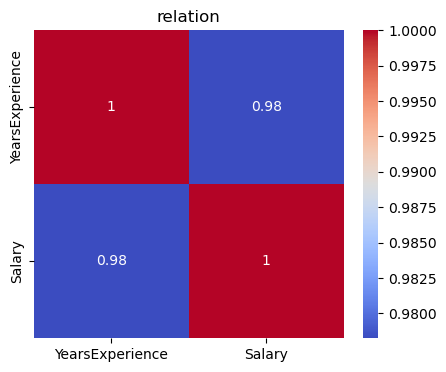

In [12]:
import seaborn as sns
corr = df[["YearsExperience","Salary"]].corr()
plt.figure(figsize = (5,4))
sns.heatmap(corr,annot=True,cmap = "coolwarm")
plt.title("relation")
plt.show()

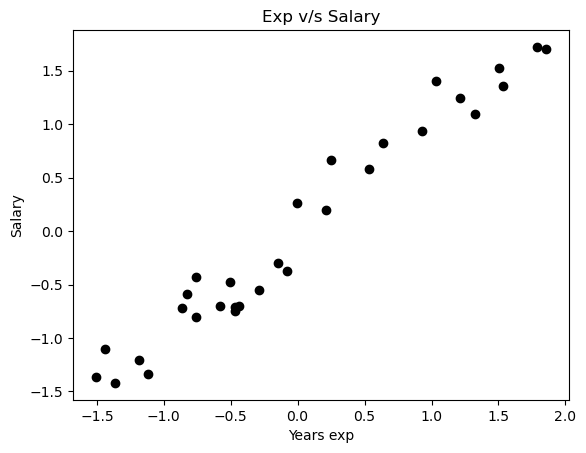

In [13]:
plt.scatter(df["YearsExperience"],df["Salary"],c="black")
plt.xlabel("Years exp")
plt.ylabel("Salary")
plt.title("Exp v/s Salary")
plt.show()

In [14]:
lr = LinearRegression()

In [15]:
from sklearn.model_selection import train_test_split
X = df["YearsExperience"].values.reshape(-1,1)
y = df["Salary"].values.reshape(-1,1)

In [16]:
(X_train,X_test,y_train,y_test) = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [17]:
y_pred = lr.fit(X_train,y_train)

In [18]:
y_pred = lr.predict(X_test)

In [19]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(mse)
print(r2)

0.06858932896507029
0.9024461774180499


In [20]:
reg_predict = lr.predict(X)

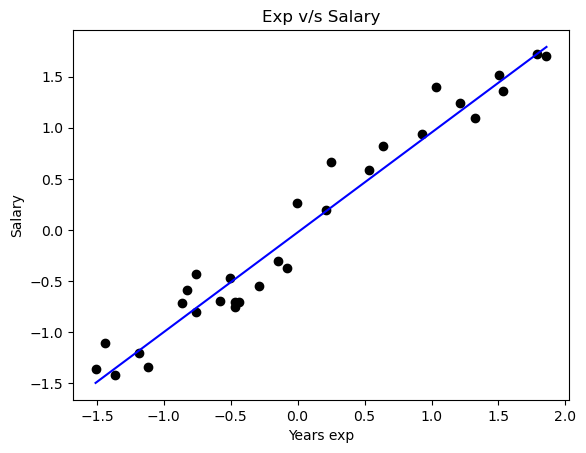

In [21]:
plt.scatter(df["YearsExperience"],df["Salary"],c="black")
plt.plot(df["YearsExperience"],reg_predict,c="blue")
plt.xlabel("Years exp")
plt.ylabel("Salary")
plt.title("Exp v/s Salary")
plt.show()

In [22]:
user_input = float(input("Enter the years exp. "))
scaled_input = scaler.fit_transform([[user_input]])
output_scaled = lr.predict(scaled_input)
predicted_salary  = scaler.inverse_transform(output_scaled)
print(f"The salary of the person is {predicted_salary[0][0]}")

Enter the years exp.  1


The salary of the person is 0.9773854413202174
